In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
def update_weights(X,W):
    for x in X:
        W += np.outer(x,x)
    #for i in range(W.shape[0]):
    #    W[i,i] = 0
    return W

def recall(x,W):
    
    x = x.reshape((-1,1))
    #print(x)
    #print(W.shape)
    #x = np.sign(np.matmul(W.T,x))
    
    for i in range(x.shape[0]):
        x[i] = np.sign(np.dot(x.T,W[i,:]))
    return x


def find_pattern(x, W, epochs):
    x_out = x.copy()
    for i in range(epochs):
        x_out = recall(x_out,W)
    return x_out

def calculate_energy(x,W):
    E_s = np.zeros(W.shape[0])
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            E_s[i] = E_s[i] + W[i,j]*x[i]*x[j]
    E = - np.sum(E_s)
    return E
def create_random_arrays(n_of_images):
    X = np.zeros((1024,1))
    #print(X.shape)
    for i in range(n_of_images):
        x = np.random.randint(0,2,size=1024)
        x[x<1] = -1
        #print(x.shape)
        x = x.reshape((-1,1))
        #print(x.shape)
        #print(X.shape)
        X = np.append(X,x,axis=1)
    X = np.delete(X,0,1)
    return X

(11264,)
(11, 1024)
(3, 1024)
[-1 -1 -1 ... -1 -1 -1]
0.0  procent noise.
9.9  procent noise.
19.9  procent noise.
29.9  procent noise.
39.9  procent noise.
49.9  procent noise.
59.9  procent noise.
69.9  procent noise.
79.9  procent noise.
89.9  procent noise.


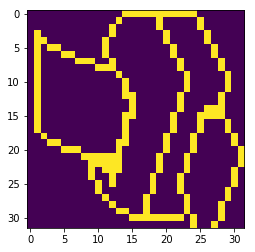

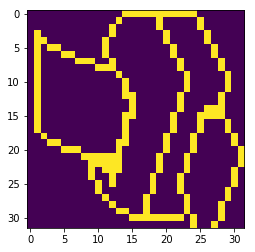

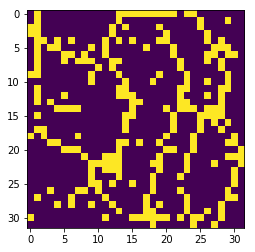

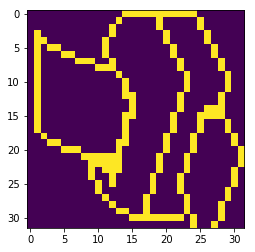

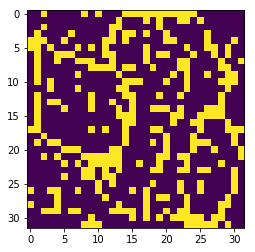

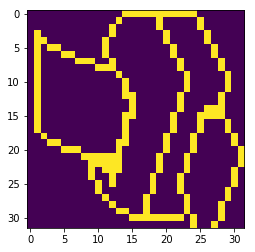

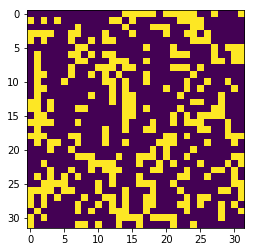

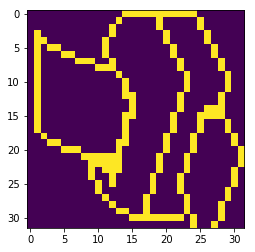

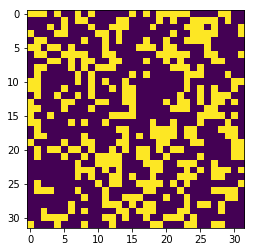

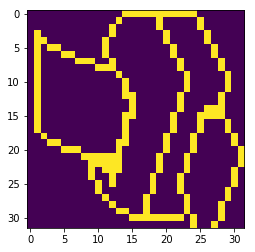

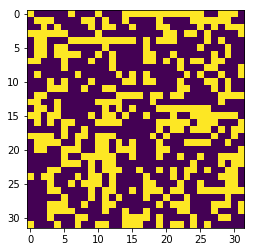

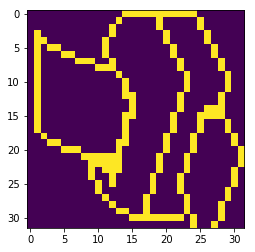

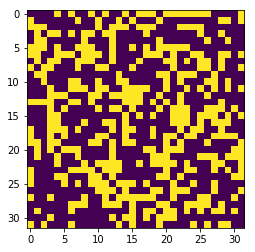

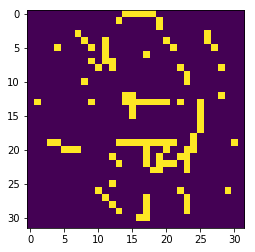

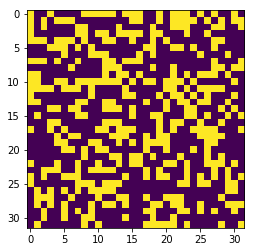

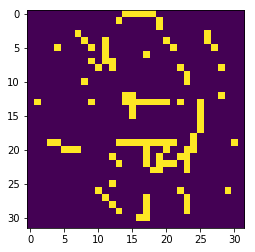

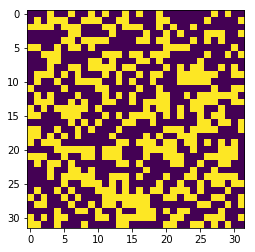

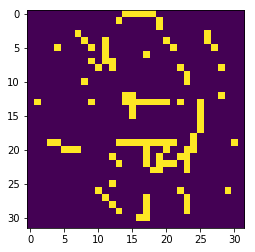

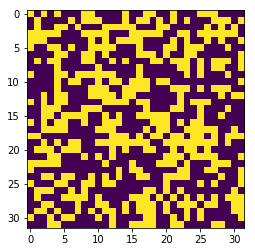

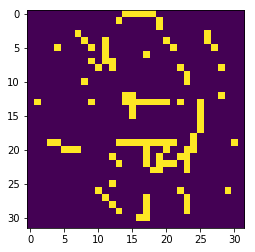

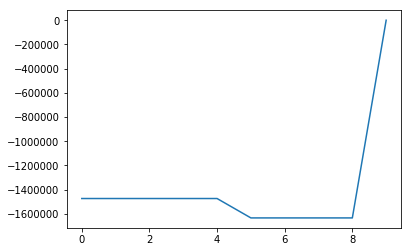

In [40]:
data = np.loadtxt('pict.dat',delimiter=",", dtype=int)
print(data.shape)
data = data.reshape(-1,1024)
print(data.shape)
#to start with learn the first three
train_X = data[0:3].copy()
print(train_X.shape)
print(data[0])
W = np.zeros((train_X.shape[1],train_X.shape[1]))
W = update_weights(train_X,W)

x = data[0]

#print(x)
epochs = 10
energy_s = np.zeros(10)
for i in range(0,1000,100):
    for i in range(i):
        index = np.random.randint(0,x.shape[0])
        x[index] = -x[index]
    plt.figure()
    plt.imshow(x.reshape((32,32)))
    x = find_pattern(x,W,epochs)
    print(i/10," procent noise.")
    plt.figure()
    plt.imshow(x.reshape((32,32)))
    E = calculate_energy(x,W)
    energy_s[int(i/100)] = E
plt.figure()
plt.plot(np.arange(10),energy_s)

(11264,)
(11, 1024)
With  2  number of images
(2, 1024)
[-1 -1 -1 ... -1 -1 -1]
0  procent noise.
x-x_get= [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
True
(array([   0,    0,    0, ..., 1023, 1023, 1023]), array([  14,   15,   16, ...,  988, 1016, 1019]))
0
With  3  number of images
(3, 1024)
[-1 -1 -1 ... -1 -1 -1]
0  procent noise.
x-x_get= [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
True
(array([   0,    0,    0, ..., 1023, 1023, 1023]), array([  14,   15,   16, ...,  988, 1016, 1019]))
0
With  4  number of images
(4, 1024)
[-1 -1 -1 ... -1 -1 -1]
0  procent noise.
x-x_get= [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
True
(array([   0,    0,    0, ..., 1023, 1023, 1023]), array([  14,   15,   16, ...,  988, 1016, 1019]))
0
With  5  number of images
(5, 1024)

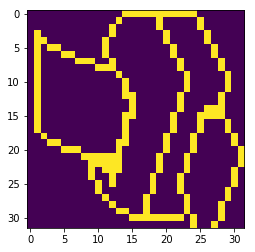

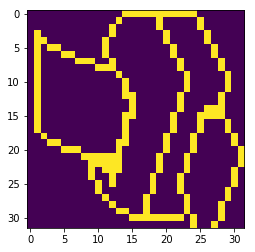

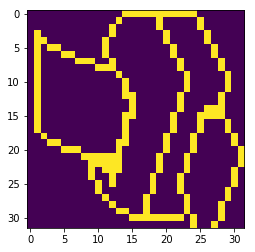

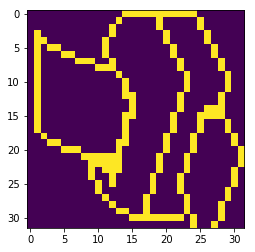

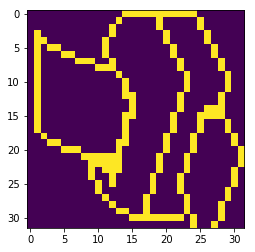

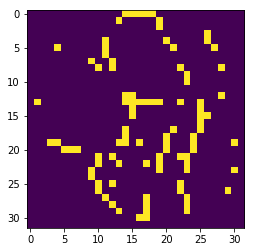

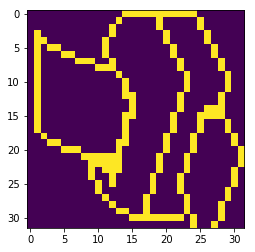

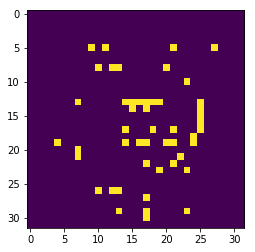

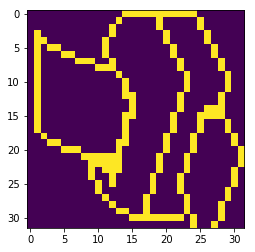

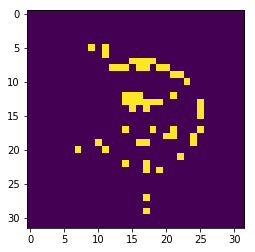

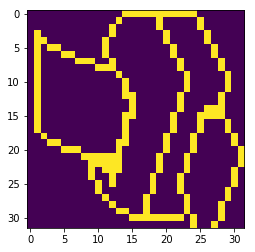

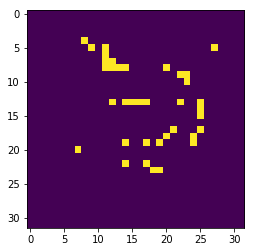

In [38]:
data = np.loadtxt('pict.dat',delimiter=",", dtype=int)
print(data.shape)
data = data.reshape(-1,1024)
print(data.shape)
#to start with learn the first three
for j in range(2,8):
    print("With ", j, " number of images")
    train_X = data[0:j].copy()
    print(train_X.shape)
    print(data[0])
    W = np.zeros((train_X.shape[1],train_X.shape[1]))
    W = update_weights(train_X,W)

    x = data[0]

    #print(x)
    epochs = 20

    #for i in range(10):
    #    index = np.random.randint(0,x.shape[0])
    #    x[index] = -x[index]
    plt.figure()
    plt.imshow(x.reshape((32,32)))
    x_get = find_pattern(x,W,epochs)
    print(0," procent noise.")
    plt.figure()
    plt.imshow(x_get.reshape((32,32)))
    x_res = x-x_get
    print("x-x_get=",x_res)
    print(np.any(x_res))
    print(np.nonzero(x_res))
    print(x_res[0,49])

Typ när vi har fler än 5 bilder så börjar den klassificera fel utan noise. Med lite noise kan vi ha ungefär 4 bilder.

# 3.5.3

(1024, 201)
(201, 1024)
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
0.0
0.0


Text(0, 0.5, 'number of pixel errors')

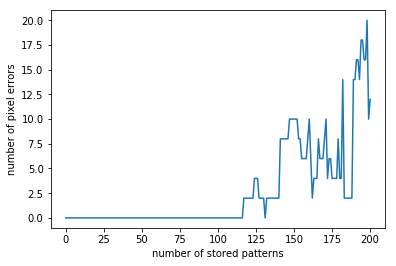

In [117]:


n_of_patterns = 200

X=create_random_arrays(n_of_patterns+1)
print(X.shape)
data = X.T
print(data.shape)
num_of_errors = np.zeros(n_of_patterns+1)
for j in range(1,n_of_patterns+1):
    #print("With ", j, " number of images")
    train_X = data[0:j].copy()
    #print(train_X.shape)
    #print(data[0])
    W = np.zeros((train_X.shape[1],train_X.shape[1]))
    W = update_weights(train_X,W)

    x = data[0]

    #print(x)
    epochs = 10

    #for i in range(10):
    #    index = np.random.randint(0,x.shape[0])
    #    x[index] = -x[index]
    
    x_get = find_pattern(x,W,epochs)
    x = x.reshape((-1,1))
    x_res = x-x_get
    #plt.figure()
    #plt.imshow(x.reshape((32,32)))
    #plt.figure()
    #plt.imshow(x_get.reshape((32,32)))
    if np.any(x_res):
        print("Error")
    #print("x-x_get=",x_res)
    abs_values = np.sum(np.absolute(x_res))
    num_of_errors[j] = abs_values
print(num_of_errors[0])
print(num_of_errors[1])
plt.plot(np.arange(n_of_patterns+1),num_of_errors)
plt.xlabel("number of stored patterns")
plt.ylabel("number of pixel errors")

We have way better performamce with the random generated patterns. We can add around 100 before the error appears. The difference is because the data has to be orthogonal in order to be stored safely. The random data is probably more so compared to the other data. 1024*0.138= 141 so it seems all right with the theory.

# 3.5.4

(1024, 301)
(301, 1024)
With  0  number of images
0
With  1  number of images
0
With  2  number of images
0
With  3  number of images
0
With  4  number of images
0
With  5  number of images
0
With  6  number of images


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


0
With  7  number of images
0
With  8  number of images
0
With  9  number of images
0
With  10  number of images
0
With  11  number of images
0
With  12  number of images
0
With  13  number of images
0
With  14  number of images
0
With  15  number of images
0
With  16  number of images
0
With  17  number of images
0
With  18  number of images
0
With  19  number of images
0
With  20  number of images
0
With  21  number of images
0
With  22  number of images
0
With  23  number of images
0
With  24  number of images
0
With  25  number of images
0
With  26  number of images
0
With  27  number of images
0
With  28  number of images
0
With  29  number of images
0
With  30  number of images
0
With  31  number of images
0
With  32  number of images
0
With  33  number of images
0
With  34  number of images
0
With  35  number of images
0
With  36  number of images
0
With  37  number of images
0
With  38  number of images
0
With  39  number of images
0
With  40  number of images
0
With  41  numbe

273
With  274  number of images
274
With  275  number of images
274
With  276  number of images
276
With  277  number of images
277
With  278  number of images
278
With  279  number of images
279
With  280  number of images
280
With  281  number of images
281
With  282  number of images
282
With  283  number of images
282
With  284  number of images
283
With  285  number of images
284
With  286  number of images
285
With  287  number of images
287
With  288  number of images
288
With  289  number of images
289
With  290  number of images
290
With  291  number of images
291
With  292  number of images
292
With  293  number of images
293
With  294  number of images
294
With  295  number of images
295
With  296  number of images
296
With  297  number of images
297
With  298  number of images
298
With  299  number of images
299
With  300  number of images
300
0.0
0.0


Text(0, 0.5, 'number of erroneous recovered')

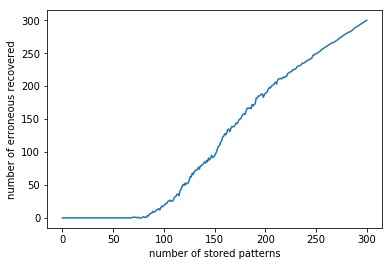

In [32]:
n_of_patterns = 300
start_value=0
X=create_random_arrays(n_of_patterns+1)
print(X.shape)
data = X.T
print(data.shape)
num_of_errors = np.zeros(n_of_patterns+1-start_value)
for j in range(start_value,n_of_patterns+1):
    print("With ", j, " number of images")
    train_X = data[0:j].copy()
    #print(train_X.shape)
    #print(data[0])
    W = np.zeros((train_X.shape[1],train_X.shape[1]))
    W = update_weights(train_X,W)


    #print(x)
    epochs = 1

    #for i in range(10):
    #    index = np.random.randint(0,x.shape[0])
    #    x[index] = -x[index]
    #print(train_X.shape[0])
    x_res = np.zeros((1024,1))
    number_of_errors = 0
    for i in range(train_X.shape[0]):
        #print(i)
        x_in = data[i]
        x_get = find_pattern(x_in,W,epochs)
        x_in = x_in.reshape((-1,1))
        #print(np.absolute(x_in-x_get))
        if np.any(x_in-x_get):
            number_of_errors +=1
        #x_res = x_res + np.absolute(x_in-x_get)
        #print(x_res)
        
    #abs_values = np.sum(np.absolute(x_res))
    print(number_of_errors)
    num_of_errors[j-start_value] = number_of_errors
print(num_of_errors[0])
print(num_of_errors[1])
plt.plot(np.arange(start_value,n_of_patterns+1),num_of_errors)
plt.xlabel("number of stored patterns")
plt.ylabel("number of erroneous recovered")

As the number of stored patterns increases the stable patterns decrease.

# 3.5.5

(1024, 101)
(101, 1024)
With  0  number of errors
(100, 1024)
20
With  100  number of errors
(100, 1024)
44
With  200  number of errors
(100, 1024)
56
With  300  number of errors
(100, 1024)
72
With  400  number of errors
(100, 1024)
79
With  500  number of errors
(100, 1024)
86
With  600  number of errors
(100, 1024)
98
With  700  number of errors
(100, 1024)
100
With  800  number of errors
(100, 1024)
100
With  900  number of errors
(100, 1024)
99
20.0
44.0


Text(0, 0.5, 'number of erroneous recovered')

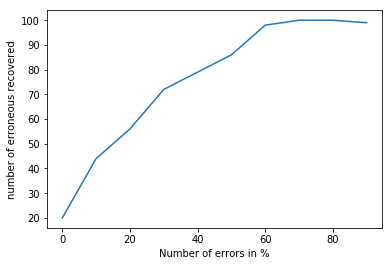

In [28]:
n_of_patterns = 100
start_value=0
X=create_random_arrays(n_of_patterns+1)
print(X.shape)
changed_bits = 1
data = X.T
print(data.shape)
num_of_errors = np.zeros(10)
for changed_bits in range(0,1000,100):
#for j in range(start_value,n_of_patterns+1):
    print("With ", changed_bits, " number of errors")
    train_X = data[0:n_of_patterns].copy()
    print(train_X.shape)
    #print(data[0])
    W = np.zeros((train_X.shape[1],train_X.shape[1]))
    W = update_weights(train_X,W)


    #print(x)
    epochs = 10


    #print(train_X.shape[0])
    x_res = np.zeros((1024,1))
    number_of_errors = 0
    for i in range(train_X.shape[0]):
        x_in = data[i].copy()
        x_error = data[i].copy()
        for i in range(changed_bits):
            index = np.random.randint(0,x_error.shape[0])
            x_error[index] = -x_error[index]

        x_get = find_pattern(x_error,W,epochs)
        x_in = x_in.reshape((-1,1))
        #print(np.absolute(x_in-x_get))
        #print(np.absolute(data[i]-x_get))
        if np.any(x_in-x_get):
            number_of_errors +=1
        #x_res = x_res + np.absolute(x_in-x_get)
        #print(x_res)

    #abs_values = np.sum(np.absolute(x_res))
    print(number_of_errors)
    num_of_errors[int(changed_bits/100)] = number_of_errors
print(num_of_errors[0])
print(num_of_errors[1])
plt.plot(10*np.arange(10),num_of_errors)
plt.xlabel("Number of errors in %")
plt.ylabel("number of erroneous recovered")

# 3.5.6

In [ ]:
print(W)

(1024, 301)
(301, 1024)
With  0  number of images
0
With  1  number of images
0
With  2  number of images
0
With  3  number of images
0
With  4  number of images
0
With  5  number of images
0
With  6  number of images
0
With  7  number of images
0
With  8  number of images
0
With  9  number of images
0
With  10  number of images
0
With  11  number of images
0
With  12  number of images
0
With  13  number of images
0
With  14  number of images
0
With  15  number of images
0
With  16  number of images
0
With  17  number of images
0
With  18  number of images
0
With  19  number of images
0
With  20  number of images
0
With  21  number of images
0
With  22  number of images
0
With  23  number of images
0
With  24  number of images
0
With  25  number of images
0
With  26  number of images
0
With  27  number of images
0
With  28  number of images
0
With  29  number of images
0
With  30  number of images
0
With  31  number of images
0
With  32  number of images
0
With  33  number of images
0


265
With  266  number of images
266
With  267  number of images
267
With  268  number of images
268
With  269  number of images
269
With  270  number of images
270
With  271  number of images
271
With  272  number of images
272
With  273  number of images
273
With  274  number of images
274
With  275  number of images
275
With  276  number of images
276
With  277  number of images
277
With  278  number of images
278
With  279  number of images
279
With  280  number of images
280
With  281  number of images
281
With  282  number of images
282
With  283  number of images
283
With  284  number of images
284
With  285  number of images
285
With  286  number of images
286
With  287  number of images
287
With  288  number of images
288
With  289  number of images
289
With  290  number of images
290
With  291  number of images
291
With  292  number of images
292
With  293  number of images
293
With  294  number of images
294
With  295  number of images
295
With  296  number of images
296
With

Text(0, 0.5, 'number of erroneous recovered')

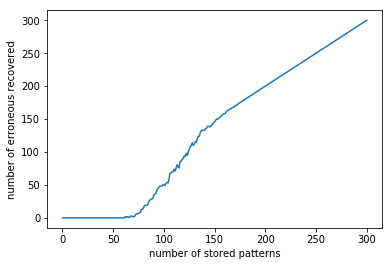

In [29]:

def update_weights_diag(X,W):
    for x in X:
        W += np.outer(x,x)
    for i in range(W.shape[0]):
        W[i,i] = 0
    return W


n_of_patterns = 300
start_value=0
X=create_random_arrays(n_of_patterns+1)
print(X.shape)
data = X.T
print(data.shape)
num_of_errors = np.zeros(n_of_patterns+1-start_value)
for j in range(start_value,n_of_patterns+1):
    print("With ", j, " number of images")
    train_X = data[0:j].copy()
    #print(train_X.shape)
    #print(data[0])
    W = np.zeros((train_X.shape[1],train_X.shape[1]))
    W = update_weights_diag(train_X,W)


    #print(x)
    epochs = 1

    #for i in range(10):
    #    index = np.random.randint(0,x.shape[0])
    #    x[index] = -x[index]
    #print(train_X.shape[0])
    x_res = np.zeros((1024,1))
    number_of_errors = 0
    for i in range(train_X.shape[0]):
        #print(i)
        x_in = data[i]
        x_get = find_pattern(x_in,W,epochs)
        x_in = x_in.reshape((-1,1))
        #print(np.absolute(x_in-x_get))
        if np.any(x_in-x_get):
            number_of_errors +=1
        #x_res = x_res + np.absolute(x_in-x_get)
        #print(x_res)
        
    #abs_values = np.sum(np.absolute(x_res))
    print(number_of_errors)
    num_of_errors[j-start_value] = number_of_errors
print(num_of_errors[0])
print(num_of_errors[1])
plt.plot(np.arange(start_value,n_of_patterns+1),num_of_errors)
plt.xlabel("number of stored patterns")
plt.ylabel("number of erroneous recovered")

(1024, 101)
(101, 1024)
With  0  number of errors
(100, 1024)
23
With  100  number of errors
(100, 1024)
46
With  200  number of errors
(100, 1024)
48
With  300  number of errors
(100, 1024)
64
With  400  number of errors
(100, 1024)
67
With  500  number of errors
(100, 1024)
80
With  600  number of errors
(100, 1024)
92
With  700  number of errors
(100, 1024)
99
With  800  number of errors
(100, 1024)
100
With  900  number of errors
(100, 1024)
100
23.0
46.0


Text(0, 0.5, 'number of erroneous recovered')

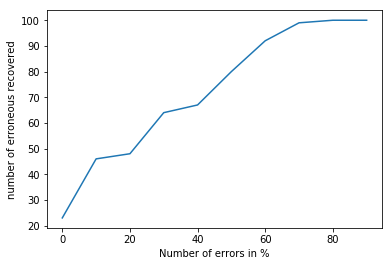

In [30]:
n_of_patterns = 100
start_value=0
X=create_random_arrays(n_of_patterns+1)
print(X.shape)
changed_bits = 1
data = X.T
print(data.shape)
num_of_errors = np.zeros(10)
for changed_bits in range(0,1000,100):
#for j in range(start_value,n_of_patterns+1):
    print("With ", changed_bits, " number of errors")
    train_X = data[0:n_of_patterns].copy()
    print(train_X.shape)
    #print(data[0])
    W = np.zeros((train_X.shape[1],train_X.shape[1]))
    W = update_weights(train_X,W)


    #print(x)
    epochs = 10


    #print(train_X.shape[0])
    x_res = np.zeros((1024,1))
    number_of_errors = 0
    for i in range(train_X.shape[0]):
        x_in = data[i].copy()
        x_error = data[i].copy()
        for i in range(changed_bits):
            index = np.random.randint(0,x_error.shape[0])
            x_error[index] = -x_error[index]

        x_get = find_pattern(x_error,W,epochs)
        x_in = x_in.reshape((-1,1))
        #print(np.absolute(x_in-x_get))
        #print(np.absolute(data[i]-x_get))
        if np.any(x_in-x_get):
            number_of_errors +=1
        #x_res = x_res + np.absolute(x_in-x_get)
        #print(x_res)

    #abs_values = np.sum(np.absolute(x_res))
    print(number_of_errors)
    num_of_errors[int(changed_bits/100)] = number_of_errors
print(num_of_errors[0])
print(num_of_errors[1])
plt.plot(10*np.arange(10),num_of_errors)
plt.xlabel("Number of errors in %")
plt.ylabel("number of erroneous recovered")